### 1. Accessing data via DDH API

##### Import required libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import csv
import sys
sys.path.append("API/pyddh")
import ddh
import urllib

DDH API reuires authentication. If you don't have credentials, you can carry on with step 2 that extracts data directly.

In [2]:
ddh.load("datacatalog.worldbank.org")

API/pyddh\ddh\__init__.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(fd)


Accessing [https://datacatalog.worldbank.org/dataset/harmonized-covid-19-household-monitoring-surveys](https://datacatalog.worldbank.org/dataset/harmonized-covid-19-household-monitoring-surveys) dataset by getting node ID from DDH 

In [3]:
ds = ddh.dataset.get(1235981)

List the resources associated with dataset

In [6]:
for i in ds['field_resources']['und']:
    dj = ddh.dataset.get(i['target_id'])
    print(dj['nid'], dj['title'])

1235986 Technical Note 
1236201 Data - COVID-19 High-Frequency Household Monitoring Surveys 
1236226 What's New Brief
1236231 What's New Brief - Past Editions
1236991 Data Dictionary


Since we want the data file, we'll move ahead with 1236201 resource ID

In [8]:
url = ddh.dataset.get(1236201)['field_upload']['und'][0]['uri']

In [9]:
url_z = "https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/" + url.split(':')[1][2:]

In [11]:
df = pd.read_excel(url_z, sheet_name=1)

In [12]:
df.head()

,row_id,code,wave,month,level_data,indicator,indicator_val,urban_rural,industry,current_lsector,...,measure_type,headline_indicator,GDP_pc,ln_GDP_pc,many_waves,weight_type,footnote,survey_producer,survey_link,last_updated
0,1,BFA,WAVE3,9.0,"Gender=All, Urb_rur=Urb/rur. sector=sectors",Know_curfew,29.975002,Rural,Other services,Other services,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
1,2,BFA,WAVE3,9.0,"Gender=All, Urb_rur=National. sector=sectors",Demo_male_sample,84.309624,National,Other services,Other services,...,p,NaN,2178.323486,7.686311,1,Unweighted,NaN,NaN,NaN,03/16/2021 15:45PM
2,3,BFA,WAVE3,9.0,"Gender=All, Urb_rur=National. sector=All",Labo_selfemp,21.014095,National,All,NaN,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
3,4,BFA,WAVE3,9.0,"Gender=All, Urb_rur=Urb/rur. sector=sectors",Know_closing,69.310043,Urban,Commerce,Commerce,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
4,5,BFA,WAVE3,9.0,"Gender=All, Urb_rur=Urb/rur. sector=sectors",Labo_nonemployee,99.345596,Rural,Agriculture,Agriculture,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM


#### 2. Alternatively you can use the resource link from DDH to access the data

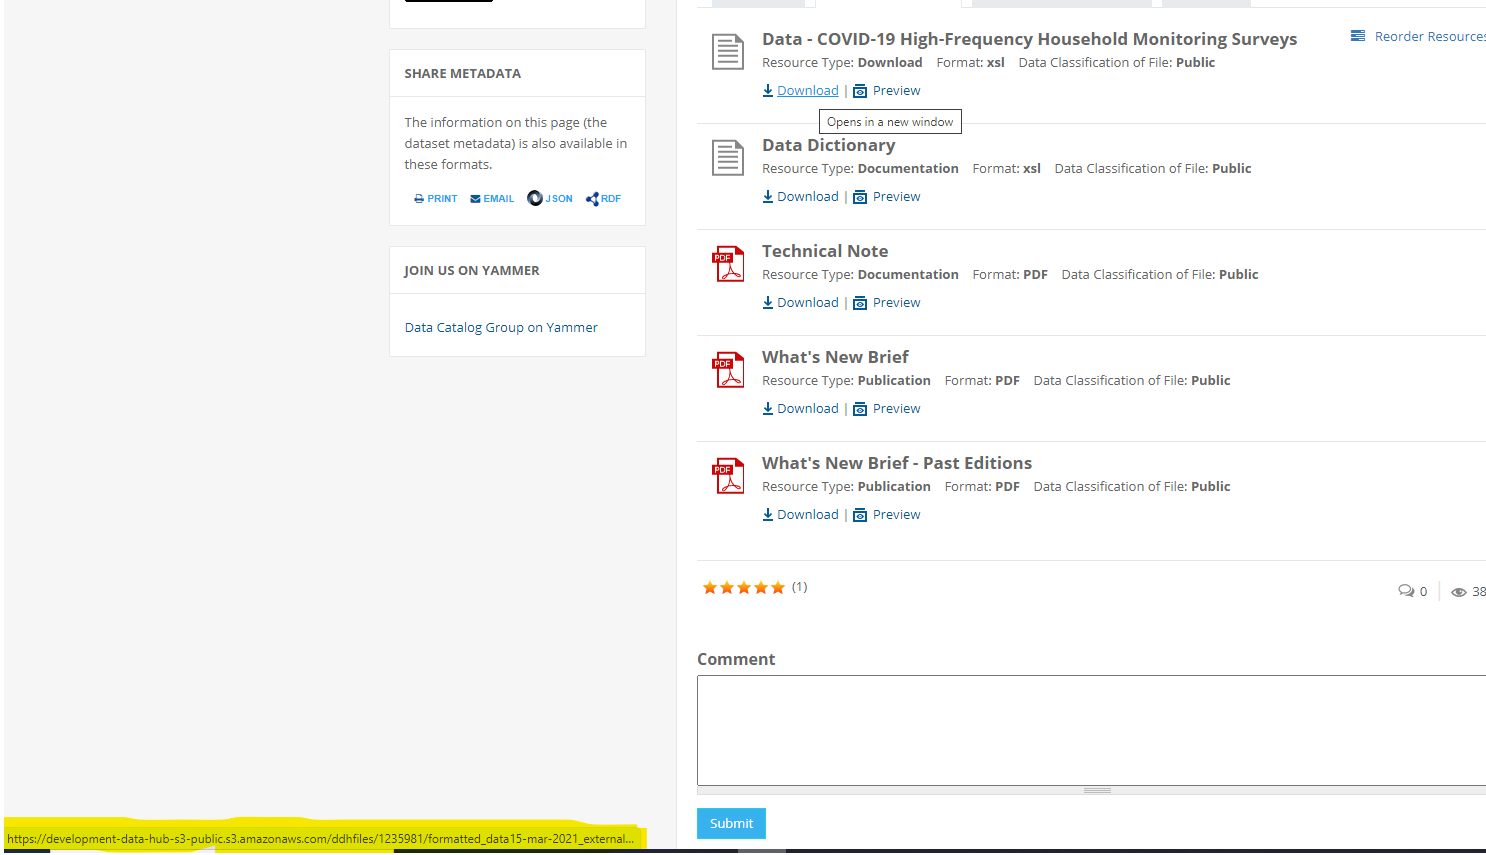

In [13]:
url_ = "https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/1235981/formatted_data15-mar-2021_external.xlsx"

In [14]:
dat = pd.read_excel(url_, sheet_name=1)

In [15]:
dat.head()

,row_id,code,wave,month,level_data,indicator,indicator_val,urban_rural,industry,current_lsector,...,measure_type,headline_indicator,GDP_pc,ln_GDP_pc,many_waves,weight_type,footnote,survey_producer,survey_link,last_updated
0,1,BFA,WAVE3,9.0,"Gender=All, Urb_rur=Urb/rur. sector=sectors",Know_curfew,29.975002,Rural,Other services,Other services,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
1,2,BFA,WAVE3,9.0,"Gender=All, Urb_rur=National. sector=sectors",Demo_male_sample,84.309624,National,Other services,Other services,...,p,NaN,2178.323486,7.686311,1,Unweighted,NaN,NaN,NaN,03/16/2021 15:45PM
2,3,BFA,WAVE3,9.0,"Gender=All, Urb_rur=National. sector=All",Labo_selfemp,21.014095,National,All,NaN,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
3,4,BFA,WAVE3,9.0,"Gender=All, Urb_rur=Urb/rur. sector=sectors",Know_closing,69.310043,Urban,Commerce,Commerce,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
4,5,BFA,WAVE3,9.0,"Gender=All, Urb_rur=Urb/rur. sector=sectors",Labo_nonemployee,99.345596,Rural,Agriculture,Agriculture,...,p,NaN,2178.323486,7.686311,1,Household weight,NaN,NaN,NaN,03/16/2021 15:45PM
